# Correlation: Relationships between columns

**TurboPanda** still has more to offer to allow seemless flowing of `pandas`-like operations, and indeed into `scikit-learn`.

In [13]:
import sys
import numpy as np
import pandas as pd
sys.path.insert(0,"../")
# our main import
import turbopanda as turb

import matplotlib.pyplot as plt
%matplotlib inline

print(turb.__version__)

0.2.4


In [14]:
g = turb.read("../data/translation.csv", name="trl")
g

MetaPanda(trl(n=5216, p=11, mem=0.918MB, options=[]))

In [15]:
g.columns

Index(['prot_IDs', 'prot_names', 'Gene_names', 'translation_G1_1',
       'translation_G1_2', 'translation_G2M_1', 'translation_G2M_2',
       'translation_MG1_1', 'translation_MG1_2', 'translation_S_1',
       'translation_S_2'],
      dtype='object', name='colnames')

## Determining the relationship between columns in a DataFrame

In `pandas`, there exists a basic correlation function `corr()` which takes
 a method type among other things and returns a correlation matrix. I 
 found this to be clunky and unreliable. Not only this, but it lacks options in terms of
 different types of correlation methods and different formats, for instance 
 in the following cases:

1. *Case one*: when two features are **not both** continuous.
2. *Case two*: when features are not type-casted properly due to `pandas` poor 
handling of missing data.
3. *Case three*: when desiring to compare *between* two datasets (say Matrix and Vector).
 `pandas` only provides intra-correlations between features in a *single dataframe*.

***

Note that matrices must be completely overlapping in order to correlate variables together. It doesn't
make sense otherwise.

| Use case | `pandas` response | `turbopanda` response |
| --------------------- | ----------------- | --------------- |
| One matrix $X$ | Correlates all using `method`<br>parameter (spearman, pearson)<br>returning Matrix | Correlates all using most<br>appropriate method (spearman,<br>pearson for continuous, biserial for boolean/cont)<br>returning list of interactions |
| Two vectors $x$,$y$ of same shape | Does not handle | Correlates using appropriate method<br>returning single value |
| One matrix $X$, one Vector $y$ | Does not handle | Correlates every column $X_i$ to vector $y$<br>using appropriate method returning<br>Vector $z$ |
| Two matrices $X$,$Y$ of same shape | Does not handle | Correlates column $X_i$ with $Y_i$ using <br>most appropriate method returning<br>Vector $z$ |
| Two matrices $X$,$Y$ of different shapes | Does not handle | Correlates every column $X_i$ with $Y_j$ using <br>most appropriate method returning<br>returning list of interactions |
 
***

In `turbopanda`, we have a dedicated `correlate()` function which handles missing,
 heterogenous datasets.
 
Note that there must be NO columns of object type or any other non-numeric data type
before calling:


In [16]:
corr = turb.correlate(g[float])
corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 12 columns):
method        36 non-null object
CI95_lower    36 non-null float64
CI95_upper    36 non-null float64
adj_r2        36 non-null float64
n             36 non-null int64
outliers      0 non-null float64
p-val         36 non-null float64
power         36 non-null float64
r             36 non-null float64
r2            36 non-null float64
x             36 non-null object
y             36 non-null object
dtypes: float64(8), int64(1), object(3)
memory usage: 3.5+ KB


In [17]:
corr.head()

,method,CI95_lower,CI95_upper,adj_r2,n,outliers,p-val,power,r,r2,x,y
0,spearman,1.00,1.00,1.000,4790,NaN,0.0,inf,1.000,1.000,translation_G1_1,translation_G1_1
1,spearman,0.94,0.95,0.896,4635,NaN,0.0,1.0,0.947,0.896,translation_G1_1,translation_G1_2
2,spearman,0.92,0.93,0.854,4543,NaN,0.0,1.0,0.924,0.854,translation_G1_1,translation_G2M_1
3,spearman,0.91,0.92,0.845,4562,NaN,0.0,1.0,0.919,0.845,translation_G1_1,translation_G2M_2
4,spearman,0.93,0.94,0.875,4621,NaN,0.0,1.0,0.936,0.875,translation_G1_1,translation_MG1_1


What we see is a list of correlation experiments, given column $x$ and $y$, we get the method used,
confidence intervals, $r$ and $r^2$, $n$, p-values and estimated power.

## Obtaining a correlation matrix

From these sets of rows, it is common to want to convert this into matrix-form using either $r$, $r^2$, or some other parameter.

In [24]:
M = turb.corr.row_to_matrix(corr)

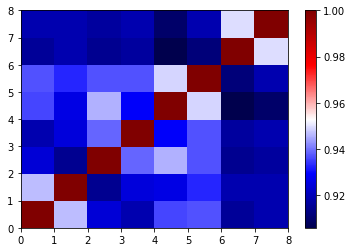

In [25]:
plt.pcolormesh(M, cmap="seismic")
plt.colorbar()
plt.show()